In [4]:
import pandas as pd
drive_root = "data/"

In [5]:
#Load transaction data
data = pd.read_csv(drive_root+"processed/groceries.csv")
data.head()

,Unnamed: 0,Member_number,Date,itemDescription
0,0,1000,15-03-2015,"['sausage', 'whole milk', 'semi-finished bread..."
1,1,1000,24-06-2014,"['whole milk', 'pastry', 'salty snack']"
2,2,1000,24-07-2015,"['canned beer', 'misc. beverages']"
3,3,1000,25-11-2015,"['sausage', 'hygiene articles']"
4,4,1000,27-05-2015,"['soda', 'pickled vegetables']"


In [7]:
#Load frequent itemsets
import pandas as pd
relative_path = "freq_itemsets/groceries_freqitemsets_0.05"
frequent_itemsets = pd.read_csv(drive_root+relative_path)
frequent_itemsets

,Unnamed: 0,support,itemsets
0,0,0.060683,['bottled water']
1,1,0.053131,['citrus fruit']
2,2,0.122101,['other vegetables']
3,3,0.051728,['pastry']
4,4,0.110005,['rolls/buns']
5,5,0.069572,['root vegetables']
6,6,0.060349,['sausage']
7,7,0.097106,['soda']
8,8,0.067767,['tropical fruit']
9,9,0.157923,['whole milk']


In [ ]:
import ast
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: tuple(ast.literal_eval(x)))
frequent_itemsets

,Unnamed: 0,support,itemsets
0,0,0.060683,"(bottled water,)"
1,1,0.053131,"(citrus fruit,)"
2,2,0.122101,"(other vegetables,)"
3,3,0.051728,"(pastry,)"
4,4,0.110005,"(rolls/buns,)"
5,5,0.069572,"(root vegetables,)"
6,6,0.060349,"(sausage,)"
7,7,0.097106,"(soda,)"
8,8,0.067767,"(tropical fruit,)"
9,9,0.157923,"(whole milk,)"


In [ ]:
import ast

# Convert the string to a list of lists
#Configure Key if necessary
dataset = [ast.literal_eval(string) for string in data["itemDescription"]]
dataset[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Example frequent itemsets
frequent_itemsets = frequent_itemsets['itemsets']

# Example transactional dataframe
# data = {'TransactionID': [1, 2, 3, 4],
#         'Items': [['item1', 'item2', 'item3'],
#                   ['item2', 'item4'],
#                   ['item1', 'item3'],
#                   ['item2', 'item3', 'item4']]}


transactions_df = pd.DataFrame(data)
#Configure Key here for transactions data if necessary
transactions_df['converted'] = transactions_df['itemDescription'].apply(lambda x: tuple([str(i) for i in x[1:-1].split(',')]))

# Convert frequent itemsets to a list of lists (required format for MultiLabelBinarizer)
frequent_itemsets_list = [tuple(itemset) for itemset in frequent_itemsets]

# Create MultiLabelBinarizer object and fit-transform the transactions
mlb = MultiLabelBinarizer(classes=frequent_itemsets_list)
binary_vectors = mlb.fit_transform(transactions_df['converted'])

# Create a new dataframe with binary vectors representing frequent itemsets
binary_df = pd.DataFrame(binary_vectors, columns=mlb.classes_, index=transactions_df.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [" 'Instant food products'", " 'UHT-milk'", " 'abrasive cleaner'", " 'artif. sweetener'", " 'baby cosmetics'", " 'bags'", " 'baking powder'", " 'bathroom cleaner'", " 'beef'", " 'berries'", " 'beverages'", " 'bottled beer'", " 'bottled water'", " 'brandy'", " 'brown bread'", " 'butter milk'", " 'butter'", " 'cake bar'", " 'candles'", " 'candy'", " 'canned beer'", " 'canned fish'", " 'canned fruit'", " 'canned vegetables'", " 'cat food'", " 'cereals'", " 'chewing gum'", " 'chicken'", " 'chocolate marshmallow'", " 'chocolate'", " 'citrus fruit'", " 'cleaner'", " 'cling film/bags'", " 'cocoa drinks'", " 'coffee'", " 'condensed milk'", " 'cooking chocolate'", " 'cookware'", " 'cream cheese '", " 'cream'", " 'curd cheese'", " 'curd'", " 'decalcifier'", " 'dental care'", " 'dessert'", " 'detergent'", " 'dish cleaner'", " 'dishes'", " 'dog food'", " 'domestic eggs'", " 'female sanitary 

In [ ]:
#Sanity check
binary_df

,"(bottled water,)","(citrus fruit,)","(other vegetables,)","(pastry,)","(rolls/buns,)","(root vegetables,)","(sausage,)","(soda,)","(tropical fruit,)","(whole milk,)","(yogurt,)"
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Initialize KMeans object
k = 3  # Number of clusters you want
kmeans = KMeans(n_clusters=k, random_state=42)


# Step 2: Fit the KMeans model to your data
kmeans.fit(binary_df)

# Step 3: Obtain cluster labels for each transaction
cluster_labels = kmeans.labels_

# Step 5: Visualize or analyze the clusters
# For example, let's add cluster labels to the original DataFrame
binary_df['Cluster'] = cluster_labels

# Display the clusters and their counts
print(binary_df['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    136472
Name: Cluster, dtype: int64


<ipython-input-12-6589c77cf941>:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(binary_df)


In [ ]:
import numpy as np

def hamming_distance(x, y):
    return np.sum(x != y)  # Calculate Hamming distance by counting mismatches

class KMeansHamming:
    def __init__(self, n_clusters=8, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit_predict(self, data):
        # Initialize cluster centroids randomly
        centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each point to the closest centroid based on Hamming distance
            labels = np.array([np.argmin([hamming_distance(x, c) for c in centroids]) for x in data])

            # Update centroids based on the mean of points in each cluster
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        return labels



In [ ]:

# Convert the DataFrame to a NumPy array
data_array = binary_df.drop(columns=['Cluster']).to_numpy()

# Initialize and fit the KMeans with Hamming distance
kmeans_hamming = KMeansHamming(n_clusters=3, max_iters=100)
clusters = kmeans_hamming.fit_predict(data_array)

# Analyze or visualize the resulting clusters
# For instance, add cluster labels to the original DataFrame or perform further analysis
print(clusters)
print(set(clusters))

<ipython-input-10-b40a81802888>:20: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[0 0 0 ... 0 0 0]
{0}


In [ ]:
clusters.sum()

In [ ]:
binary_df.drop(columns=['Cluster'],inplace=True)

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric='euclidean')

clusterer.fit(binary_df)
labels = clusterer.labels_

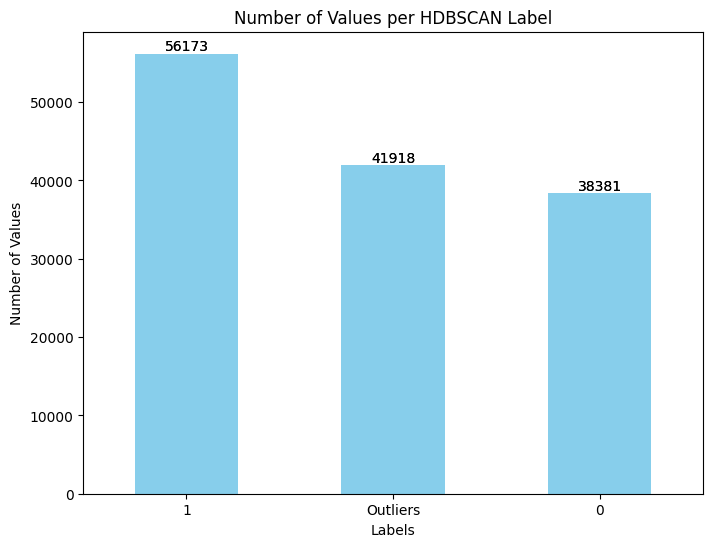

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = pd.Series(labels).value_counts()
# Rename label -1 to "Outliers"
label_counts.rename({-1: 'Outliers'}, inplace=True)
# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = label_counts.plot(kind='bar', color='skyblue')
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Values')
plt.title('Number of Values per HDBSCAN Label')
plt.xticks(rotation=0)  # Rotate x-labels if needed

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{int(bar.get_height())}', ha='center', va='bottom')
plt.show()

In [ ]:
import numpy as np
print(np.sum(labels==1))
print(np.sum(labels==0))
print(np.sum(labels==-1))

56173
38381
41918


In [ ]:

clusterer = hdbscan.HDBSCAN(metric='hamming')

clusterer.fit(binary_df)
labels = clusterer.labels_




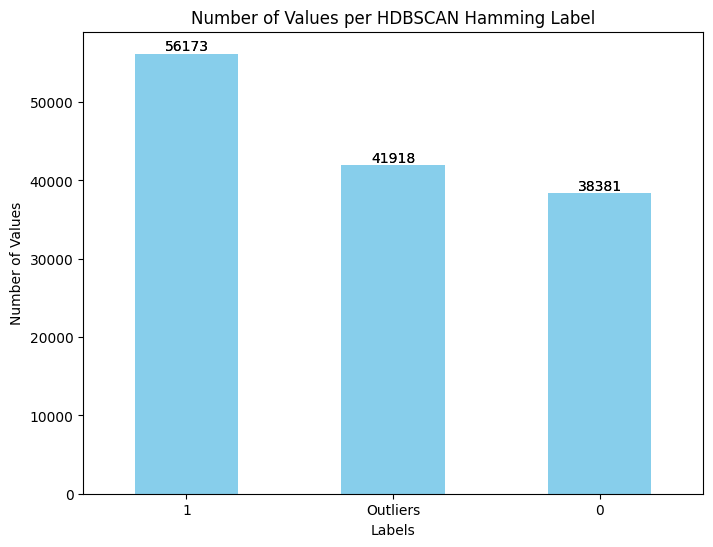

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = pd.Series(labels).value_counts()
# Rename label -1 to "Outliers"
label_counts.rename({-1: 'Outliers'}, inplace=True)
# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = label_counts.plot(kind='bar', color='skyblue')
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Values')
plt.title('Number of Values per HDBSCAN Hamming Label')
plt.xticks(rotation=0)  # Rotate x-labels if needed

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{int(bar.get_height())}', ha='center', va='bottom')
plt.show()

In [ ]:
import numpy as np
print(np.sum(labels==1))
print(np.sum(labels==0))
print(np.sum(labels==-1))

56173
38381
41918


In [ ]:
import time
import hdbscan
from sklearn.metrics.pairwise import pairwise_distances

# Measure time taken by another method using Hamming distance (for comparison)
start_time_hamming = time.time()
clusterer = hdbscan.HDBSCAN(metric='hamming')
clusterer.fit(binary_df)
end_time_hamming = time.time()
time_taken_hamming = end_time_hamming - start_time_hamming
print(f"Time taken by HDBSCAN Hamming: {time_taken_hamming} seconds")

# Measure time taken by HDBSCAN
start_time_hdbscan = time.time()
clusterer = hdbscan.HDBSCAN(metric='euclidean')
clusterer.fit(binary_df)
end_time_hdbscan = time.time()
time_taken_hdbscan = end_time_hdbscan - start_time_hdbscan
print(f"Time taken by HDBSCAN Euclidean: {time_taken_hdbscan} seconds")


Time taken by HDBSCAN Hamming: 0.37477850914001465 seconds
Time taken by HDBSCAN Euclidean: 0.6796355247497559 seconds
